Első mérés:
A legnagyobb sebesség: 6.240 m/s
A gömb alaktényezője: 0.508

Második mérés:
A legnagyobb sebesség: 6.307 m/s
A gömb alaktényezője: 0.497

Harmadik mérés:
A legnagyobb sebesség: 5.646 m/s
A gömb alaktényezője: 0.620


Az átlagos végsebesség: 6.064 m/s
Az átlagos alaktényező: 0.542


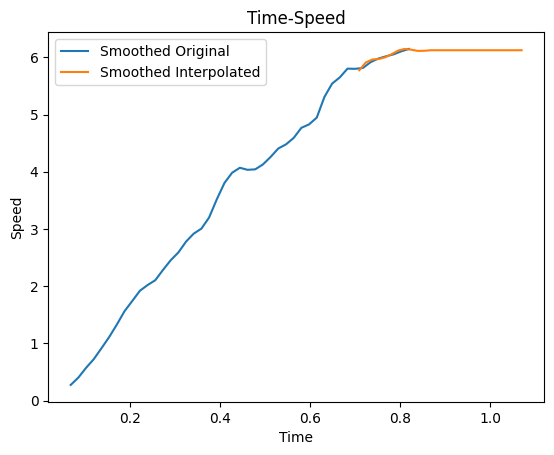

Átlagok közötti különbség: 0.169 m/s
A test közel konstans sebességgel esett az utolsó szakaszon.


In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

""" 
Székely Dániel - JAXC3C
A gömb alaktényezőjének kiszámítása

Jelmagyarázat:

A pingpong-labda tömege (m)
A pingpong-labda térfogatának sűrűsége (p)
A gravitációs gyorsulás (g)
A pingpong-labda átmérője (d)
A pingpong-labda sebessége (v)
Az alaktényező (C)
A levegő sűrűsége (p_air)
"""

def get_p_air(T):
     # kg/m^3
    if T == 0:
        p_air = 1.2928
    elif T == 10:
        p_air = 1.2471
    elif T == 15:
        p_air = 1.2255
    elif T == 20:
        p_air = 1.2045 
    elif T == 25:
        p_air = 1.1843
    elif T == 30:
        p_air = 1.1648
    else:
        print("Nem megfelelő hőmérséklet!")
        return None
    return p_air

def calc_C(m, d, v, t, g):
    p_air = get_p_air(t)  # Sűrűség a levegő hőmérsékletétől függően
    A = (math.pi * (d / 2)**2) * 2 # Egy félgömb felülete 
    C = (m * g) / (v**2 * 0.5 * p_air * A) # A gömb alaktényezőjének kiszámítása
    print(f"A gömb alaktényezője: {C:.3f}")
    return C

def calc_avg_final_speed(speed_measurements):
    # A mérési pontatlanság miatt a legnagyobb és legkisebb értékeket kiszűrjük és átlagoljuk a végsebesseg elérése utáni értékeket
    speed_measurements = speed_measurements[-8:]
    max_speed = np.max(speed_measurements)
    min_speed = np.min(speed_measurements)
    speed_measurements = [speed for speed in speed_measurements if speed != max_speed and speed != min_speed]
    final_speed = np.mean(speed_measurements)
    print(f"A legnagyobb sebesség: {final_speed:.3f} m/s")
    return final_speed

def get_data(filename):
    data = np.genfromtxt(filename, dtype=float, usecols=(0, 1), usemask=True, invalid_raise=False)
    time_measurements = data[:, 0]
    speed_measurements = data[:, 1]
    return time_measurements, speed_measurements

def main():
    
    # Alapadatok    
    m = 0.003  # kg (pingpong-labda tömege)
    d = 0.04  # m (a pingpong-labda átmérője)
    t = 25 # Celsius fokban (a levegő hőmérséklete)
    g = 9.81 # m/s^2 (a gravitációs gyorsulás)
    
    ############################################
    
    # Első mérés    
    print("Első mérés:")
    time_measurements_1, speed_measurements_1 = get_data("./elso_meres.txt")
    
    v_1 = calc_avg_final_speed(speed_measurements_1)
    C_1 = calc_C(m, d, v_1, t, g)
    
    ############################################
    
    # Második mérés    
    print("\nMásodik mérés:")
    time_measurements_2, speed_measurements_2 = get_data("./masodik_meres.txt")
    
    v_2 = calc_avg_final_speed(speed_measurements_2)
    C_2 = calc_C(m, d, v_2, t, g)
    
    ############################################
      
    # Harmadik mérés    
    print("\nHarmadik mérés:")
    time_measurements_3, speed_measurements_3 = get_data("./harmadik_meres.txt")
    
    v_3 = calc_avg_final_speed(speed_measurements_3)
    C_3 = calc_C(m, d, v_3, t, g)

    ############################################
    
    # Átlagos értékek    
    avg_time = [(t1 + t2 + t3) / 3 for t1, t2, t3 in zip(time_measurements_1, time_measurements_2, time_measurements_3)]
    avg_speed = [(s1 + s2 + s3) / 3 for s1, s2, s3 in zip(speed_measurements_1, speed_measurements_2, speed_measurements_3)]
    
    C_avg = (C_1 + C_2 + C_3) / 3
    v_avg = (v_1 + v_2 + v_3) / 3
    print("\n")
    print(f"Az átlagos végsebesség: {v_avg:.3f} m/s")  
    print(f"Az átlagos alaktényező: {C_avg:.3f}")
    
    ############################################
    
    # Bizonyítás interpolációval
    
    to_inter_time = avg_time[-10:]
    to_inter_speed = avg_speed[-10:]

    # Az interpolációhoz szükséges időpontok
    num_interpolated = 10
    future_time = 0.25  # Jövőbeli időegység
    interpolated_time = np.linspace(to_inter_time[0], to_inter_time[-1] + future_time, num=len(to_inter_time)-1+num_interpolated*2)

    # Az interpoláció során meghatározott sebességek
    interpolated_speed = np.interp(interpolated_time, to_inter_time, to_inter_speed)

    window_size = 4
    smoothed_speed = np.convolve(avg_speed, np.ones(window_size)/window_size, mode='valid')
    smoothed_interpolated_speed = np.convolve(interpolated_speed, np.ones(window_size)/window_size, mode='valid')

    # Eredeti és az interpolált pontok ábrázolása
    plt.plot(avg_time[window_size-1:], smoothed_speed, label='Smoothed Original')
    #plt.plot(avg_time, avg_speed, label='Original')
    plt.plot(interpolated_time[window_size-1:], smoothed_interpolated_speed, label='Smoothed Interpolated')
    #plt.plot(interpolated_time, interpolated_speed, label='Interpolated')
    plt.xlabel('Time')
    plt.ylabel('Speed')
    plt.title('Time-Speed')
    plt.legend()
    plt.show()

    
    ############################################
    
    # További bizonyítás átlagolással
    
    # Sebességek kiszámítása az utolsó szakaszon
    velocities = avg_speed[-4:]
    avg_last = np.mean(velocities)

    # Sebességek kiszámítása az előző szakaszon
    prev_velocities = avg_speed[-8:-4]
    avg_prev = np.mean(prev_velocities)

    # Átlagok közötti különbség kiszámítása
    diff = abs(avg_last - avg_prev)    
    
    print(f'Átlagok közötti különbség: {diff:.3f} m/s')
    
    # Ha a különbség kicsi, akkor a test közel konstans sebességgel esett
    if diff < 0.20:
        print("A test közel konstans sebességgel esett az utolsó szakaszon.")
    else:
        print("A test nem esett közel konstans sebességgel az utolsó szakaszon.")
    
main()